In [2]:
import numpy as np
import pickle
from matplotlib import pyplot as plt
from juno_custom.lattice_generation import lattice_utils
from scipy import fftpack

In [68]:
with open(r"C:\Users\Dadie1\Downloads\Efield.pkl", "rb") as f:
    ideal_efield = pickle.load(f)

with open(r"C:\Users\Dadie1\Downloads\Maskintensity(1).pkl", "rb") as f:
    pupil_mask = pickle.load(f)

pupil_mask_loaded = pupil_mask

In [4]:
pixel_size = 0.1
NA_outer = 0.38
NA_inner = 0.22
index = 1.33

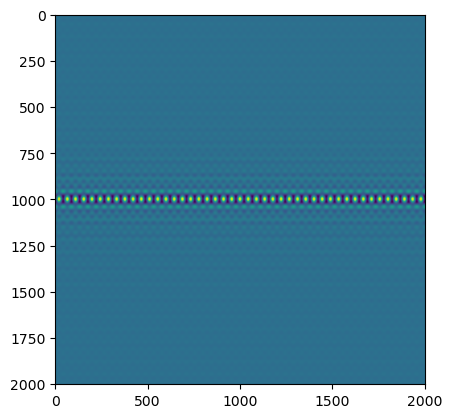

In [5]:
plt.imshow(ideal_efield)

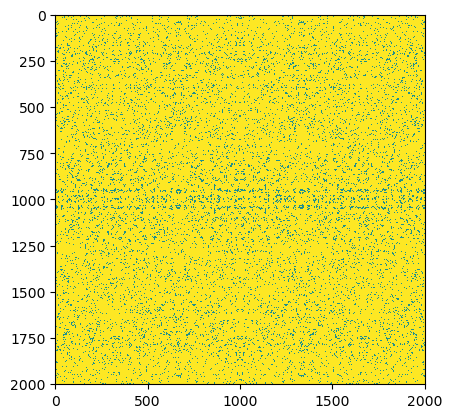

In [6]:
ideal_efield *= np.pi
wavefront_efield = 1 * np.exp(1j * ideal_efield)
plt.imshow(np.abs(wavefront_efield)**2)

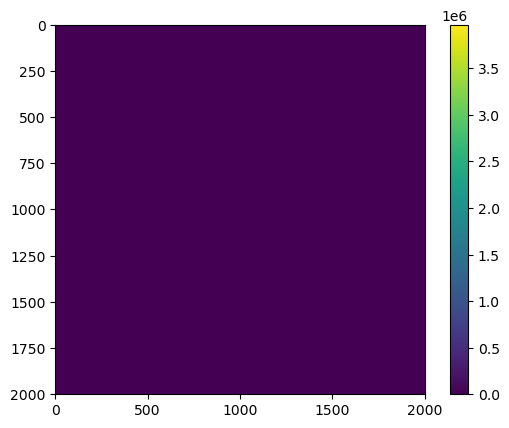

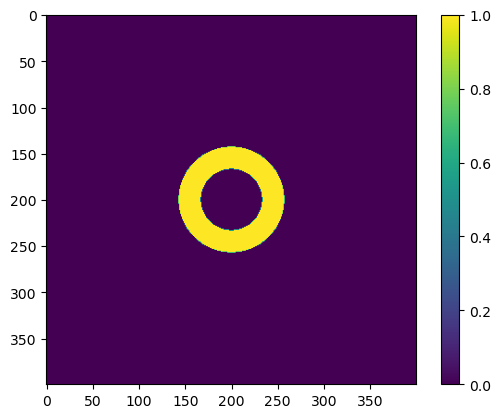

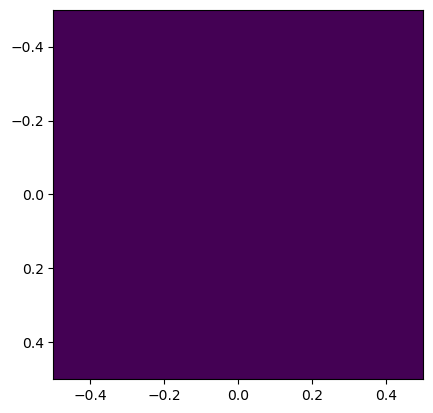

In [69]:
pupil_efield = fftpack.ifftshift(fftpack.fft2(wavefront_efield))
plt.imshow(np.abs(pupil_efield))
plt.colorbar()
plt.show()

pupil_mask = lattice_utils.get_annular_mask(wavefront_efield,pixel_size, NA_outer, NA_inner, index)
plt.imshow(pupil_mask[800:1200, 800:1200])
plt.colorbar()
plt.show()

plt.imshow(pupil_mask_loaded[800:1200, 800:1200])
# filtered_pupil_efield = pupil_efield * pupil_mask

# filterd_pupil_efield_abs = np.abs(filtered_pupil_efield)
# print(filtered_pupil_efield.dtype)
# # plot
# plt.imshow(filterd_pupil_efield_abs[800:1200, 800:1200])
# plt.colorbar()
# plt.show()

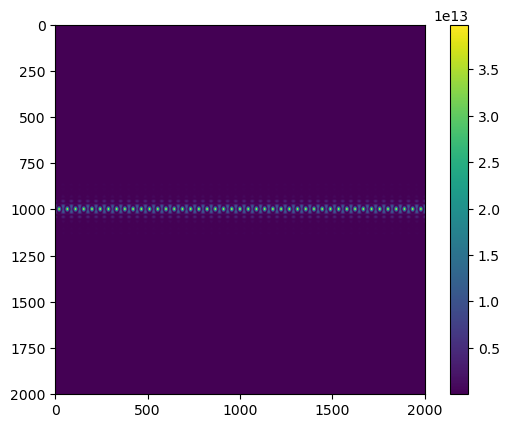

complex128


In [8]:
filtered_efield = fftpack.fftshift(fftpack.fft2(filterd_pupil_efield_abs))
plt.imshow(np.abs(filtered_efield)**2)
plt.colorbar()
plt.show()

new_phase_2 = np.abs(filtered_efield)**2
# new_phase /= np.max(new_phase)
# new_phase *= 3*np.pi


print(filtered_efield.dtype)

In [16]:
# plt.imshow(new_phase)
# plt.colorbar()
# plt.show()
# new_wavefront = np.exp(1j * new_phase)
# plt.imshow((np.abs(new_wavefront)**2)[800:1200, 800:1200])
# plt.colorbar()


complex128


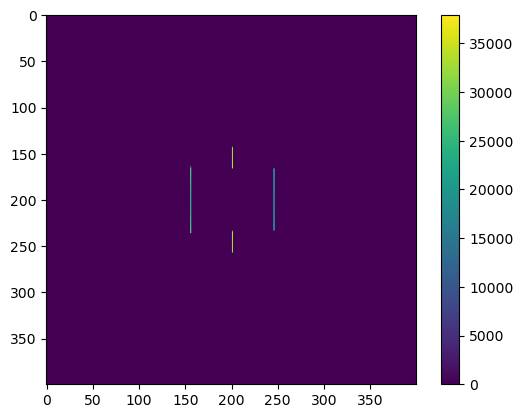

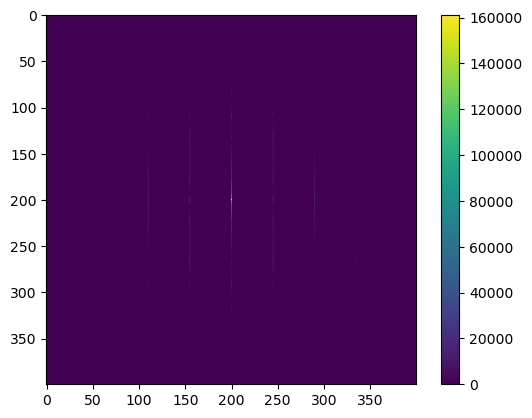

C:\Users\Dadie1\AppData\Local\Temp\ipykernel_13896\1952522610.py:15: RuntimeWarning: overflow encountered in exp
  filtered_wavefront = np.exp(1j * filtered_efield)


In [17]:
# take ifft
filtered_efield_ifft = np.fft.ifft2(filtered_efield)
print(filtered_efield_ifft.dtype)
plt.figure()
plt.imshow(np.abs(filtered_efield_ifft)[800:1200, 800:1200])
plt.colorbar()
plt.show()

filterd_efield_ifft_abs = np.fft.fftshift(np.fft.ifft2(np.abs(filtered_efield)))
plt.imshow(np.abs(filterd_efield_ifft_abs)[800:1200, 800:1200])
plt.colorbar()
plt.show()


filtered_wavefront = np.exp(1j * filtered_efield)


In [18]:
filtered_abs_field = np.abs(filtered_efield)
filtered_square_field = filtered_abs_field**2

# filtered_abs_field /= np.max(filtered_abs_field)
# filtered_abs_field *= np.pi
# filtered_square_field /= np.max(filtered_square_field)
# filtered_square_field *= np.pi


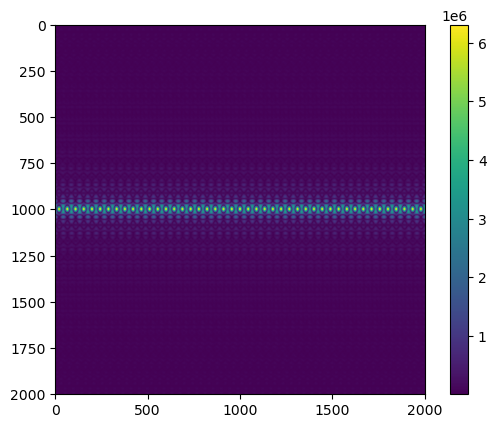

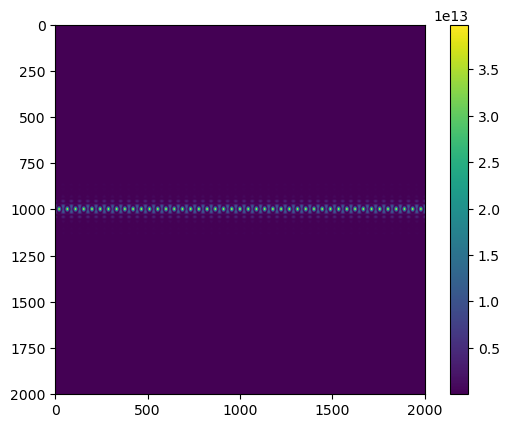

In [19]:
plt.figure()
plt.imshow(filtered_abs_field)
plt.colorbar()

plt.figure()
plt.imshow(filtered_square_field)
plt.colorbar()


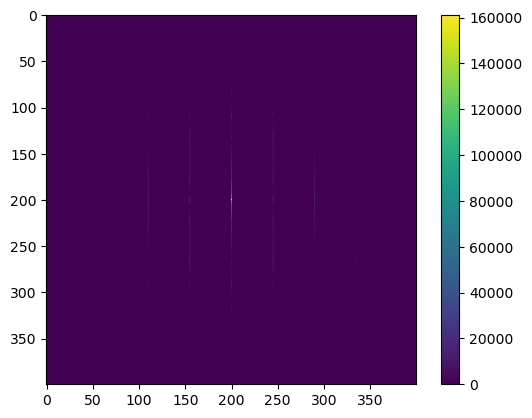

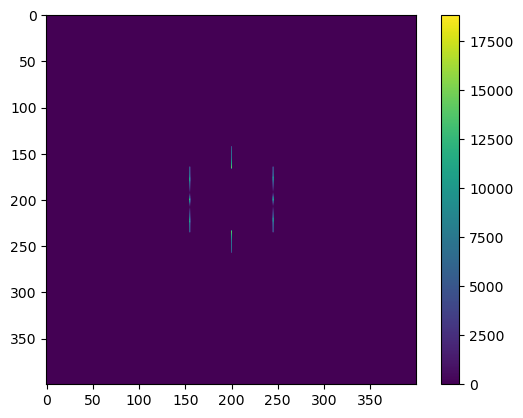

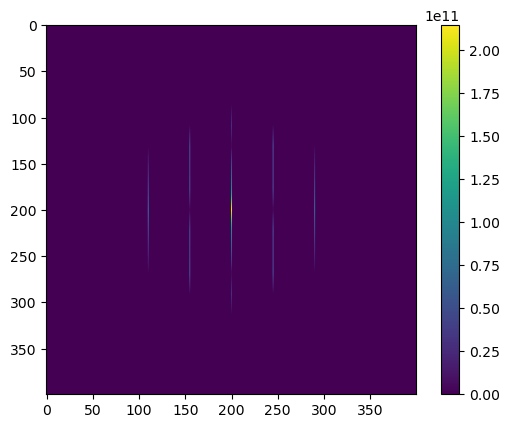

In [20]:
# take ffts
pupil_abs_field = np.fft.fftshift(np.fft.ifft2(filtered_abs_field))
plt.imshow(np.abs(pupil_abs_field)[800:1200, 800:1200])
plt.colorbar()
plt.show()
annular_mask = lattice_utils.get_annular_mask(pupil_abs_field, pixel_size, NA_outer, NA_inner, index)
filtered_pupil_efield = pupil_abs_field * annular_mask

# plot
plt.imshow(np.abs(filtered_pupil_efield)[800:1200, 800:1200])
plt.colorbar()
plt.show()

pupil_squared_field = np.fft.fftshift(np.fft.ifft2(filtered_square_field))
plt.imshow(np.abs(pupil_squared_field)[800:1200, 800:1200])
plt.colorbar()
plt.show()

In [21]:
wavefront_abs_field = 1 * np.exp(1j * filtered_abs_field)
wavefront_square_field = 1 * np.exp(1j * filtered_square_field)


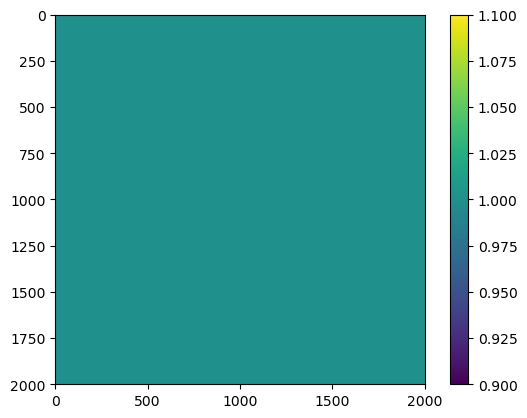

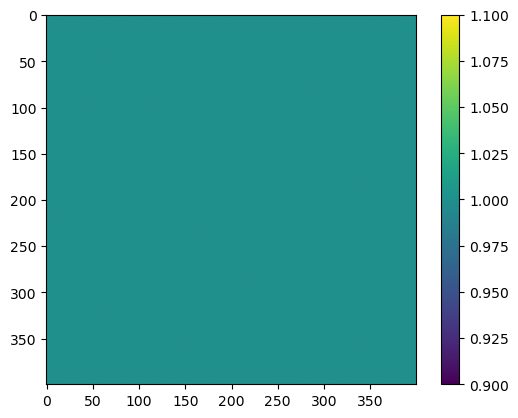

In [ ]:
plt.imshow(np.abs(wavefront_abs_field))
plt.colorbar()
plt.show()

plt.imshow(np.abs(wavefront_square_field)[800:1200, 800:1200])
plt.colorbar()
plt.show()


This shows that the "ideal" e-field is unfiltered:

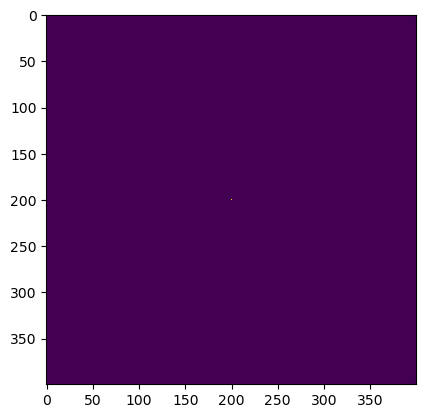

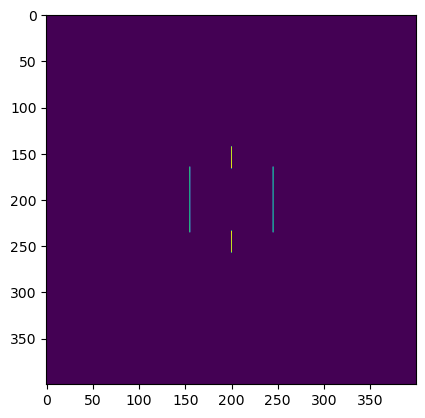

In [22]:
# take ffts
fft_field = np.fft.fftshift(np.fft.fft2(wavefront_efield))
plt.imshow(np.abs(fft_field)[800:1200, 800:1200])
plt.show()
plt.imshow((np.abs(fft_field)*annular_mask)[800:1200, 800:1200])


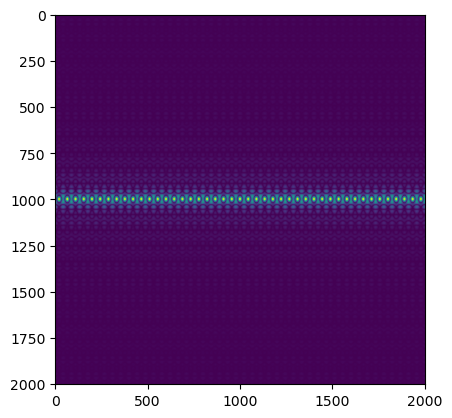

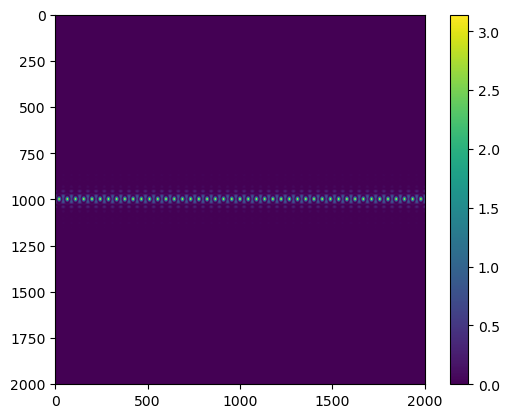

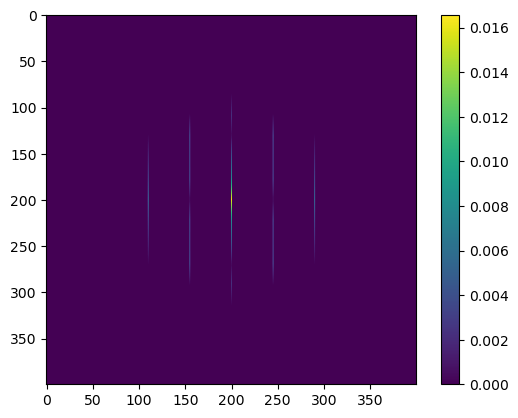

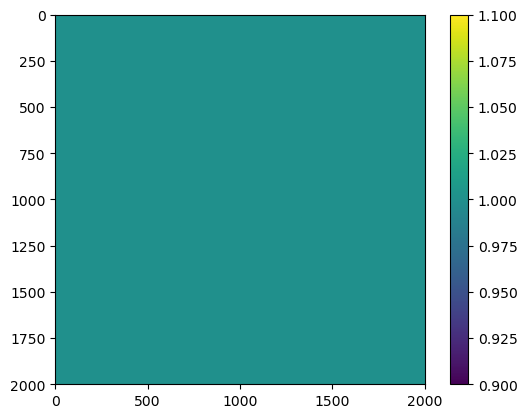

In [23]:
fft_new_field = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(np.abs(fft_field)*annular_mask)))
plt.imshow(np.abs(fft_new_field))
plt.show()

new_phase = (np.abs(fft_new_field)**2)
# normalise from 0 to pi
new_phase /= np.max(new_phase)
new_phase *= np.pi
plt.imshow(new_phase)
plt.colorbar()
plt.show()

ifft_new_phase = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(new_phase)))
plt.imshow(np.abs(ifft_new_phase)[800:1200, 800:1200])
plt.colorbar()
plt.show()


new_wavefront = np.exp(1j * new_phase)
plt.imshow(np.abs(new_wavefront))
plt.colorbar()
plt.show()


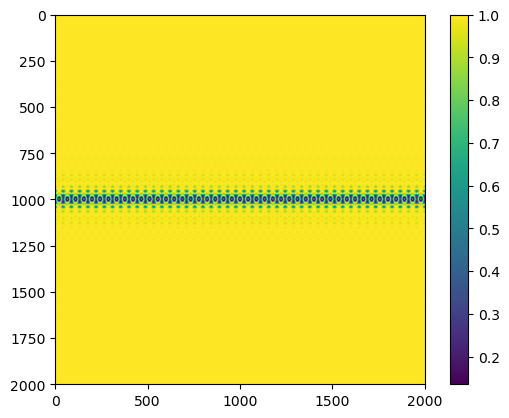

In [ ]:
# at this point, the phase should be fft_new
wavefront_new = 1 * np.exp(1j * new_wavefront)
plt.imshow(np.abs(wavefront_new)**2)
plt.colorbar()
plt.show()



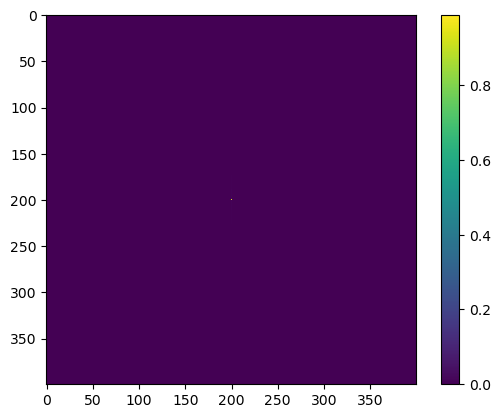

In [ ]:
ifft_wavefront_new = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(wavefront_new)))
plt.imshow(np.abs(ifft_wavefront_new)[800:1200, 800:1200])
plt.colorbar()
plt.show()


In [ ]:
from juno.Simulation import generate_sq_freq_arr, propagate_over_distance

In [ ]:
fft_wavefront_new = np.fft.fftshift(np.fft.fft2(wavefront_new))
pixel_size = 0.1
freq_arr = generate_sq_freq_arr(wavefront_new, pixel_size)
wavelength = 1
wavenumber = 2 * np.pi / wavelength
distance = wavelength*0.1
rounded_output, propagation = propagate_over_distance(
    fft_wavefront_new, distance, freq_arr, wavenumber
)


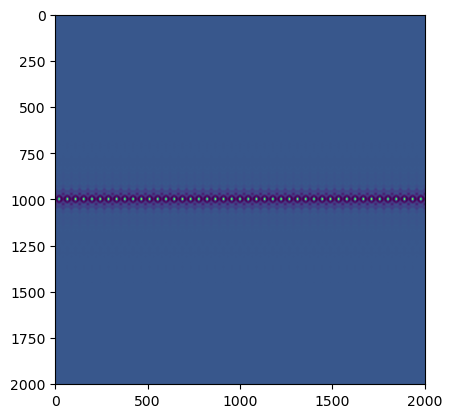

In [ ]:
plt.imshow((np.abs(rounded_output)**2))

In [24]:
from juno.Simulation import generate_sq_freq_arr, propagate_over_distance

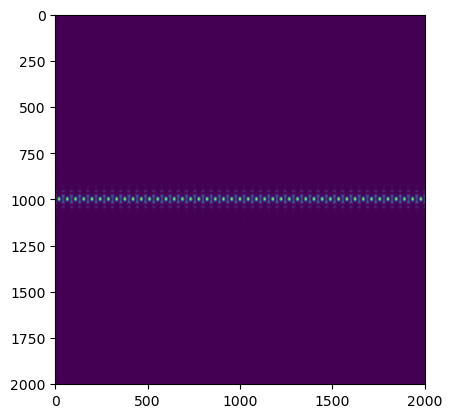

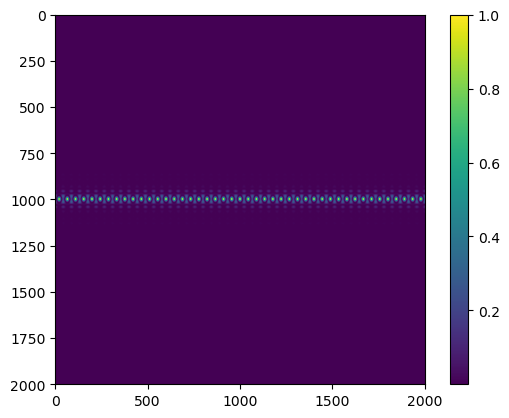

In [25]:
plt.imshow(new_phase_2)
new_phase_2 /= np.max(new_phase_2)

plt.show()

plt.imshow(new_phase_2)
plt.colorbar()


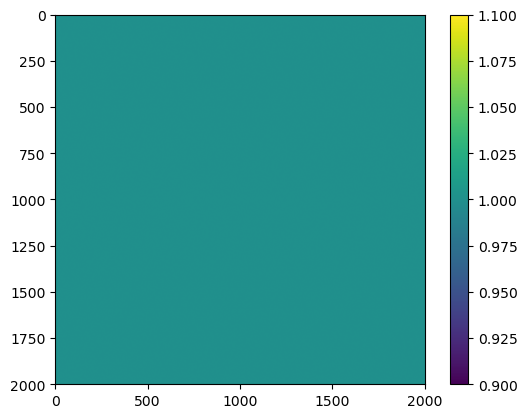

In [26]:
wavefront_2 = 1 * np.exp(1j * new_phase_2)
plt.imshow(np.abs(wavefront_2)**2)
plt.colorbar()


In [27]:
fft_wavefront_2 = np.fft.fftshift(np.fft.fft2(wavefront_2))
pixel_size = 0.25
freq_arr = generate_sq_freq_arr(wavefront_2, pixel_size)
wavelength = 1
wavenumber = 2 * np.pi / wavelength
distance = wavelength*21
rounded_output, propagation = propagate_over_distance(
    fft_wavefront_2, distance, freq_arr, wavenumber
)


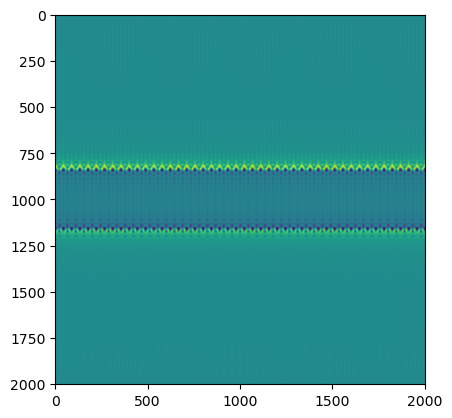

In [28]:
plt.imshow(rounded_output**2)

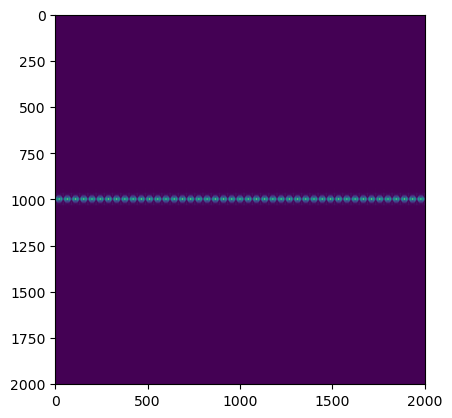

In [29]:
fft_wavefront_2 = np.fft.fftshift(np.fft.fft2(new_phase_2))
pixel_size = 0.25
freq_arr = generate_sq_freq_arr(new_phase_2, pixel_size)
wavelength = 1
wavenumber = 2 * np.pi / wavelength
distance = wavelength*1
rounded_output, propagation = propagate_over_distance(
    fft_wavefront_2, distance, freq_arr, wavenumber
)
plt.imshow(rounded_output)


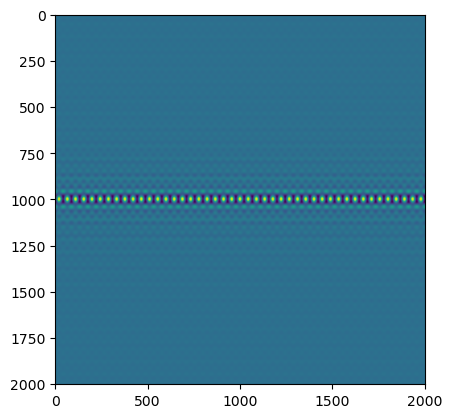

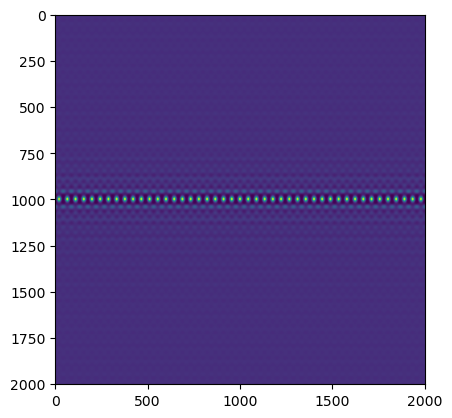

In [44]:
plt.imshow(ideal_efield)
plt.show()
ideal_intensity = np.abs(ideal_efield)**2
plt.imshow(ideal_intensity)

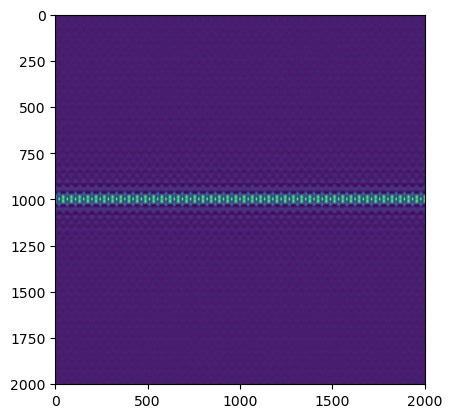

In [31]:
fft_wavefront_2 = (np.fft.fft2(ideal_intensity))
pixel_size = 0.1
freq_arr = generate_sq_freq_arr(ideal_intensity, pixel_size)
wavelength = 1
wavenumber = 2 * np.pi / wavelength
distance = wavelength*12
rounded_output, propagation = propagate_over_distance(
    fft_wavefront_2, distance, freq_arr, wavenumber
)
plt.imshow(rounded_output)


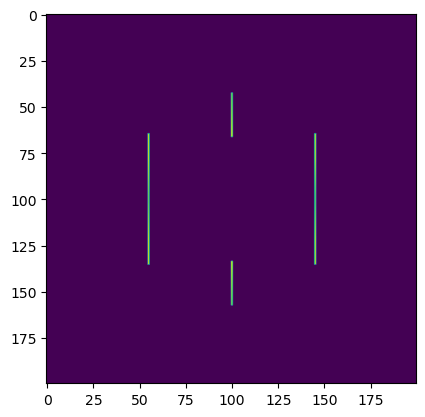

In [67]:
filtered_ideal_efield_pupil = np.abs(fftpack.fftshift(fftpack.fft2(ideal_intensity))) * pupil_mask
plt.imshow(filtered_ideal_efield_pupil[900:1100, 900:1100])

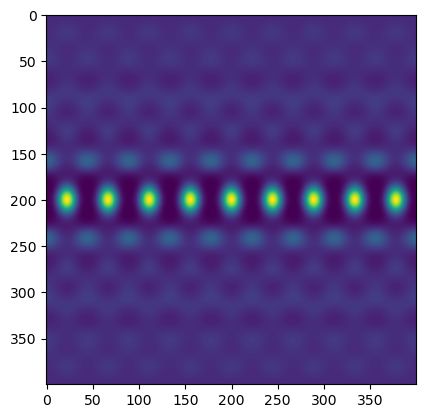

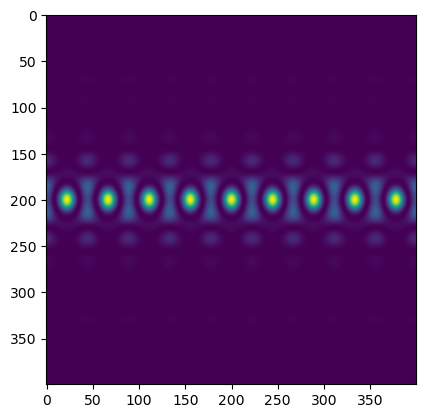

In [51]:

refiltered = fftpack.fftshift(fftpack.ifft2(filtered_ideal_efield_pupil))
refiltered_intensity = np.abs(refiltered)**2
plt.imshow(ideal_intensity[800:1200, 800:1200])
plt.show()
plt.imshow(refiltered_intensity[800:1200, 800:1200])


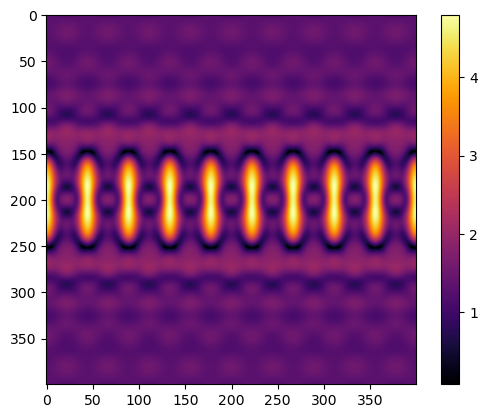

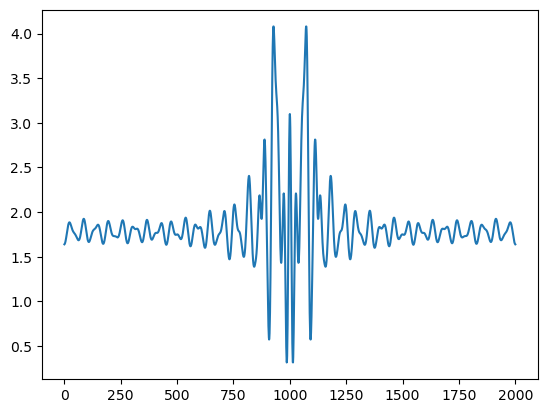

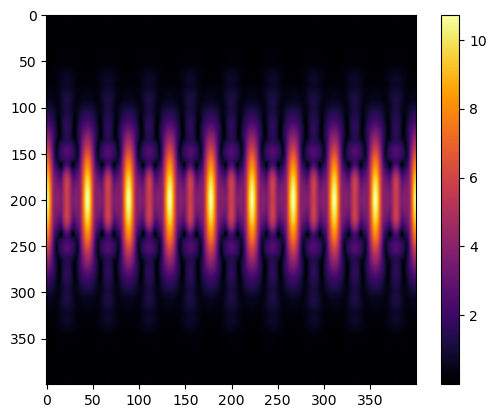

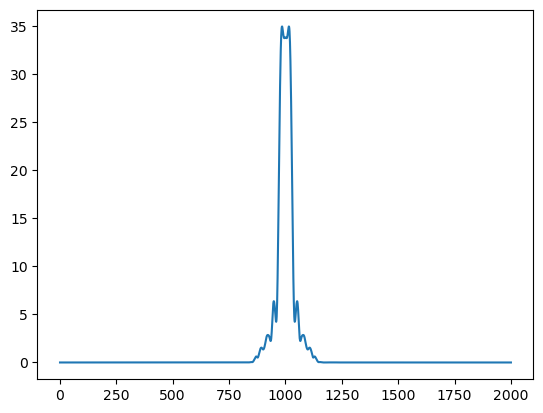

In [66]:
fft_wavefront_intensity = (np.fft.fft2(ideal_intensity))
pixel_size = 0.1
freq_arr = generate_sq_freq_arr(ideal_intensity, pixel_size)
wavelength = 1
distance = wavelength*21
wavenumber = 2 * np.pi / wavelength
cmap="inferno"

rounded_output, propagation = propagate_over_distance(
    fft_wavefront_intensity, distance, freq_arr, wavenumber
)
plt.imshow(np.sqrt(rounded_output)[800:1200, 800:1200], cmap=cmap)
plt.colorbar()
plt.show()
plt.plot(rounded_output[:, 1000])
plt.show()

plt.figure()
fft_wavefront_refiltered = (np.fft.fft2(refiltered_intensity))
freq_arr = generate_sq_freq_arr(refiltered_intensity, pixel_size)
rounded_output, propagation = propagate_over_distance(
    fft_wavefront_refiltered, distance, freq_arr, wavenumber
)
plt.imshow(np.sqrt(rounded_output)[800:1200, 800:1200], cmap=cmap)
plt.colorbar()
plt.show()
plt.figure(3)
plt.plot(rounded_output[:, 1000])
plt.show()